In [1]:
import os
# 显示工作路径
print(os.getcwd())

# 设置工作路径
os.chdir('/Users/ss/Documents/Self_modulate_VisualCortex')

# 显示当前路径
print(os.getcwd())

/Users/ss/Documents/Self_modulate_VisualCortex/Scripts/2_Behav_Data_analysis
/Users/ss/Documents/Self_modulate_VisualCortex


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = 'Output/2_Exp_behav_data/Exp1_task1_002.csv'
data = pd.read_csv(file_path)

# 数据预处理：去除缺失值
data = data.dropna(subset=['rt', 'correct'])

In [4]:
# 使得中文字体可以显示
# 设置字体为Arial Unicode MS
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
# 过滤出 formal_test 阶段的数据
formal_test_data = data[data['stage'] == 'formal_test']

# 根据 block 分组并计算每个 block 的正确率
block_grouped = formal_test_data.groupby('block')

# 计算每个 block 的正确率
block_accuracy = (block_grouped['correct'].mean() * 100).round(2)

# 输出每个 block 的正确率
print("Formal Test 阶段每个 block 的正确率（百分比）:")
print(block_accuracy)

Formal Test 阶段每个 block 的正确率（百分比）:
block
0.0      89.83
1.0      87.72
2.0      98.33
3.0     100.00
4.0      96.61
5.0      98.25
6.0     100.00
7.0      92.98
8.0     100.00
9.0      93.33
10.0    100.00
11.0     93.33
Name: correct, dtype: float64


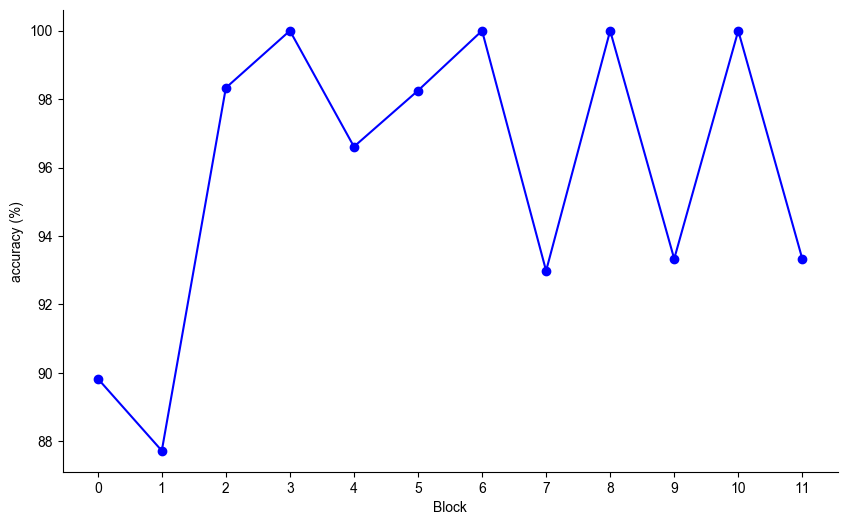

In [6]:
# 绘制每个 block 的正确率折线图
plt.figure(figsize=(10, 6))
block_accuracy.plot(kind='line', marker='o', color='b')
plt.xlabel('Block')
plt.ylabel('accuracy (%)')
plt.xticks(block_accuracy.index)  
sns.despine()
plt.show()

Formal Test 阶段每个 block 的平均反应时间（ms）:
block
0.0     681.45
1.0     835.94
2.0     657.35
3.0     635.93
4.0     633.90
5.0     725.45
6.0     720.85
7.0     764.27
8.0     564.76
9.0     753.57
10.0    703.01
11.0    708.05
Name: rt, dtype: float64


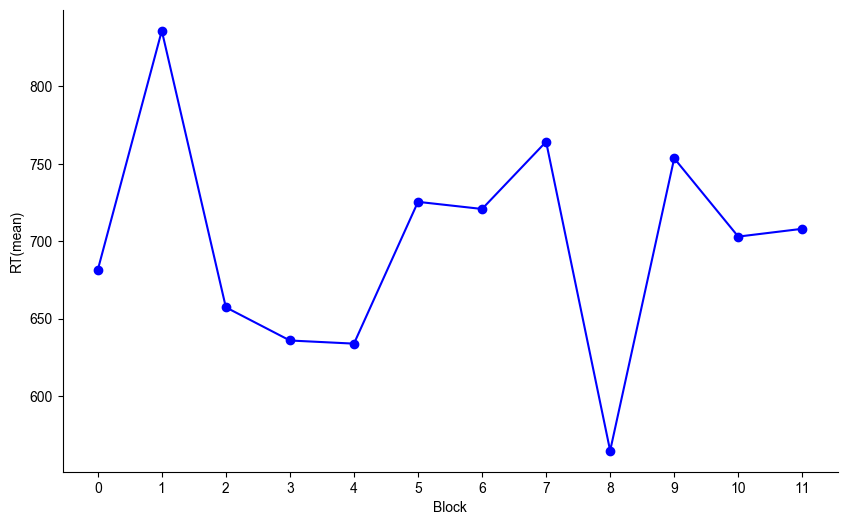

In [7]:
# 计算每个 block 的平均反应时间并保留两位小数
block_mean_rt = block_grouped['rt'].mean().round(2)

# 输出每个 block 的平均反应时间
print("Formal Test 阶段每个 block 的平均反应时间（ms）:")
print(block_mean_rt)

# 绘制每个 block 的平均反应时间折线图
plt.figure(figsize=(10, 6))
block_mean_rt.plot(kind='line', marker='o', color='b')
plt.xlabel('Block')
plt.ylabel('RT(mean)')
plt.xticks(block_mean_rt.index)  
sns.despine()
plt.show()

每个阶段的平均反应时间（ms）:
stage
training       1209.70
testing         671.79
formal_test     697.78
Name: rt, dtype: float64


/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_89594/1308162642.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stage_grouped = data.groupby('stage')


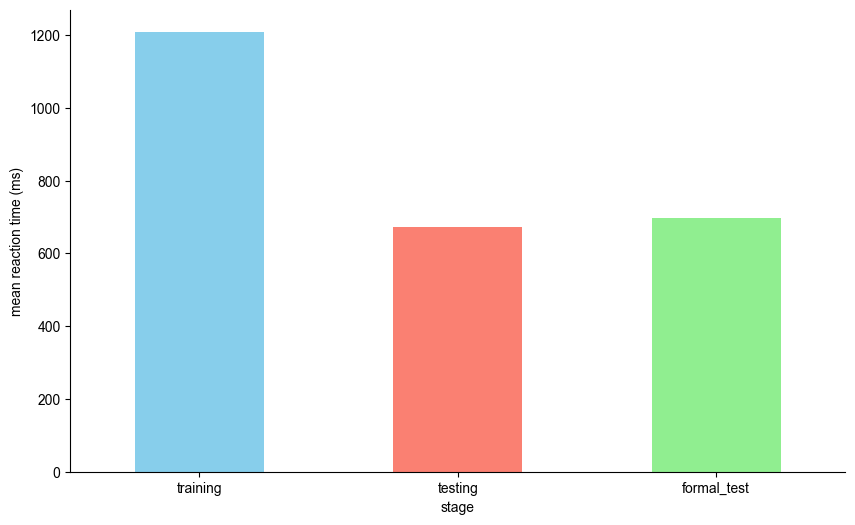

In [8]:
# 设置阶段的顺序
stage_order = ['training', 'testing', 'formal_test']
data['stage'] = pd.Categorical(data['stage'], categories=stage_order, ordered=True)

# 根据阶段（stage）分组并计算每个阶段的平均反应时间
stage_grouped = data.groupby('stage')

# 计算每个阶段的平均反应时间并保留两位小数
stage_mean_rt = stage_grouped['rt'].mean().round(2)

# 输出每个阶段的平均反应时间
print("每个阶段的平均反应时间（ms）:")
print(stage_mean_rt)

# 绘制每个阶段的平均反应时间柱状图
plt.figure(figsize=(10, 6))
stage_mean_rt.reindex(stage_order).plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('stage')
plt.ylabel('mean reaction time (ms)')
plt.xticks(rotation=0)
sns.despine()
plt.show()

/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_89594/996886645.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stage', y='rt', data=data, order=stage_order, palette='Set3')


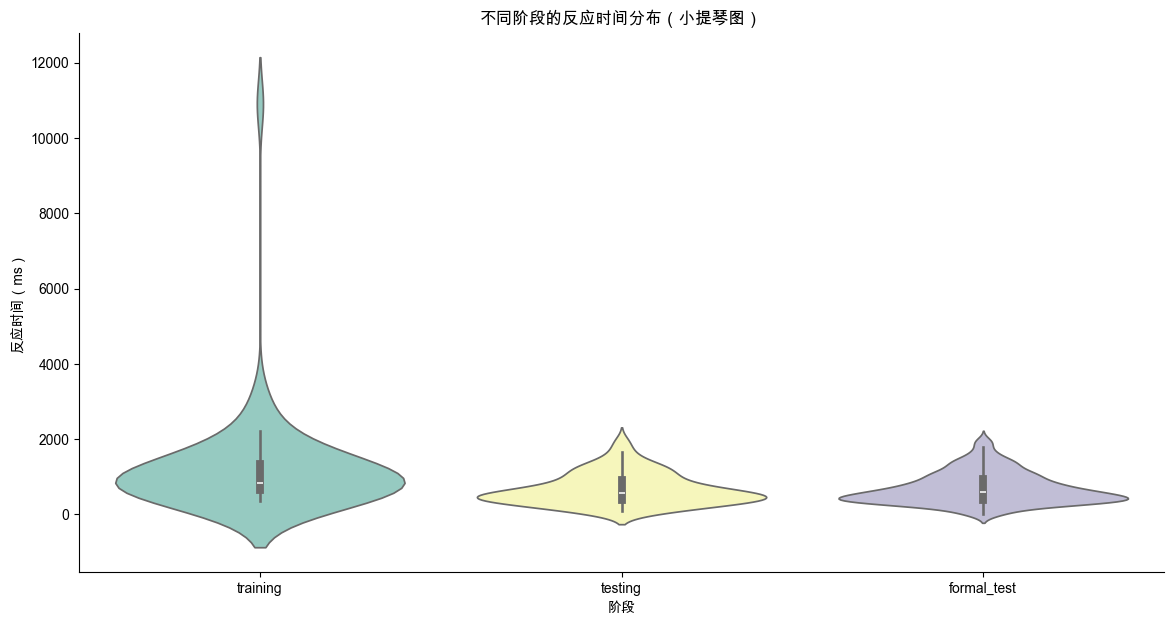

In [9]:
# 设置阶段的顺序
stage_order = ['training', 'testing', 'formal_test']
data['stage'] = pd.Categorical(data['stage'], categories=stage_order, ordered=True)

# 绘制反应时间的小提琴图
plt.figure(figsize=(14, 7))
sns.violinplot(x='stage', y='rt', data=data, order=stage_order, palette='Set3')
plt.title('不同阶段的反应时间分布（小提琴图）')
plt.xlabel('阶段')
plt.ylabel('反应时间（ms）')
sns.despine()
plt.show()

/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_913/1315480231.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acc_df = df.groupby(["stage", "condition"])["correct"].mean().reset_index()


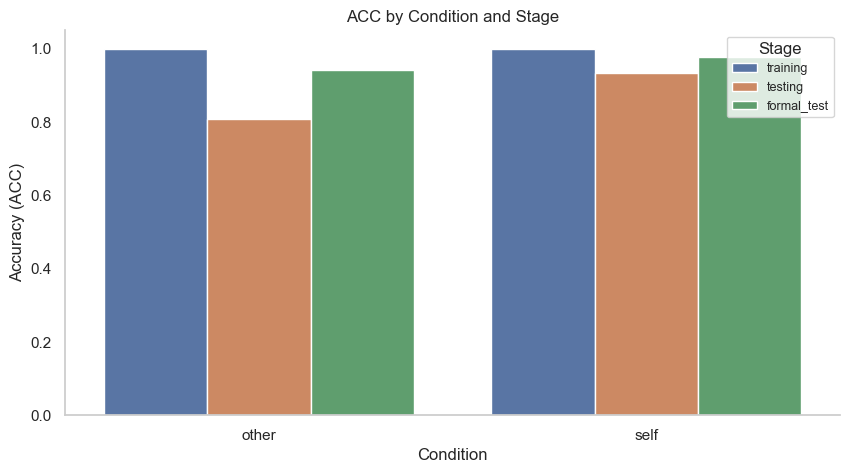

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'Output/2_Exp_behav_data/Exp1_task1_002.csv'
df = pd.read_csv(file_path)
df = df.dropna(subset=['rt', 'correct'])

# 转换 rt 为数值类型
df["rt"] = pd.to_numeric(df["rt"], errors="coerce")

# 计算 ACC（每个 stage 和 condition 下 correct 的均值）
stage_order = ['training', 'testing', 'formal_test']
df['stage'] = pd.Categorical(df['stage'], categories=stage_order, ordered=True)

acc_df = df.groupby(["stage", "condition"])["correct"].mean().reset_index()
acc_df.rename(columns={"correct": "ACC"}, inplace=True)

# 设置绘图风格
sns.set_theme(style="whitegrid")

# 创建分面柱状图（ACC）
plt.figure(figsize=(10, 5))
sns.barplot(data=acc_df, x="condition", y="ACC", hue="stage", errorbar="sd", capsize=0.1)
plt.title("ACC by Condition and Stage")
plt.ylabel("Accuracy (ACC)")
plt.xlabel("Condition")
plt.legend(title="Stage", prop={'size': 9})
plt.grid(False) 
sns.despine()
plt.show()


/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_89594/1813443981.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rt_df = df.groupby(["stage", "condition"])["rt"].mean().reset_index()


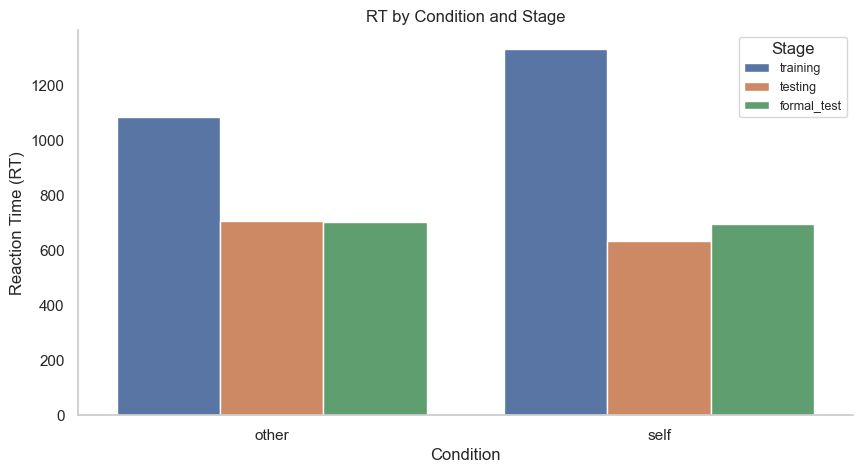

In [11]:
# 计算 RT（每个 stage 和 condition 下 rt 的均值）
stage_order = ['training', 'testing', 'formal_test']
df['stage'] = pd.Categorical(df['stage'], categories=stage_order, ordered=True)

rt_df = df.groupby(["stage", "condition"])["rt"].mean().reset_index()
rt_df.rename(columns={"rt": "RT"}, inplace=True)

# 设置绘图风格
sns.set_theme(style="whitegrid")

# 创建分面柱状图（RT）
plt.figure(figsize=(10, 5))
sns.barplot(data=rt_df, x="condition", y="RT", hue="stage", errorbar="sd", capsize=0.1)
plt.title("RT by Condition and Stage")
plt.ylabel("Reaction Time (RT)")
plt.xlabel("Condition")
plt.legend(title="Stage", prop={'size': 9})
plt.grid(False)
sns.despine()
plt.show()

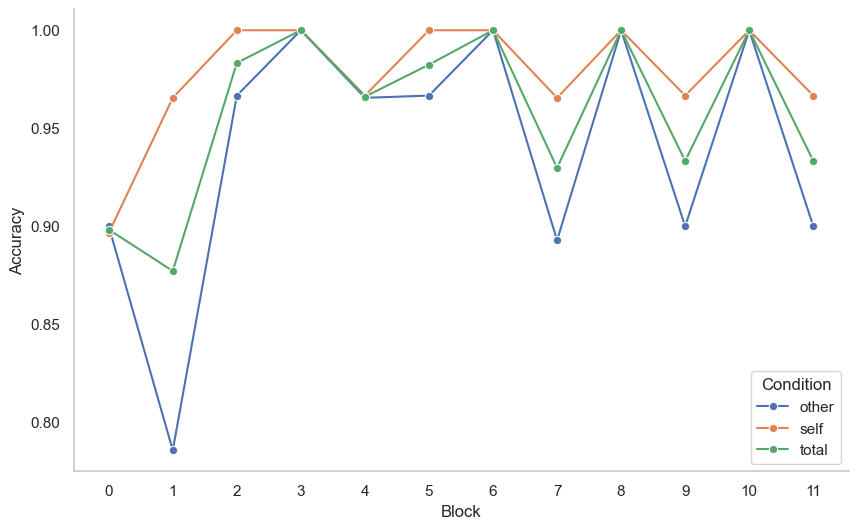

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 筛选 stage 为 formal_test 的数据
df_formal_test = df[df["stage"] == "formal_test"]

# 计算不同 block 下，不同 condition（self 和 other）的正确率
accuracy_data = df_formal_test.groupby(["block", "condition"])["correct"].mean().reset_index()

# 计算每个 block 的总正确率
total_accuracy_data = df_formal_test.groupby("block")["correct"].mean().reset_index()
total_accuracy_data["condition"] = "total"  # 添加一个新的 condition 列用于区分

# 将 block 转换为数值类型并排序
accuracy_data["block"] = accuracy_data["block"].astype(int)
total_accuracy_data["block"] = total_accuracy_data["block"].astype(int)
accuracy_data = accuracy_data.sort_values("block")
total_accuracy_data = total_accuracy_data.sort_values("block")

# 合并数据
combined_data = pd.concat([accuracy_data, total_accuracy_data])

# 绘图
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x="block", y="correct", hue="condition", marker="o")

# 设置图表标题和标签
plt.xlabel("Block", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(range(0, 12))  # 设置 x 轴刻度为 0~12
plt.legend(title="Condition")
plt.grid(False)

sns.despine()  # 去除上方和右侧的边框
# 显示图表
plt.show()

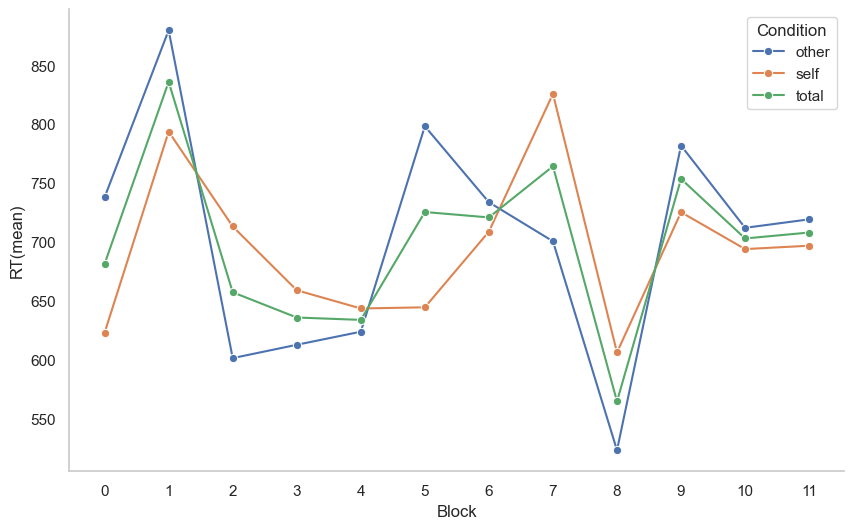

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 筛选 stage 为 formal_test 的数据
df_formal_test = df[df["stage"] == "formal_test"]

# 计算不同 block 下，不同 condition（self 和 other）的 RT 均值
rt_data = df_formal_test.groupby(["block", "condition"])["rt"].mean().reset_index()

# 计算每个 block 的总 RT 均值
total_rt_data = df_formal_test.groupby("block")["rt"].mean().reset_index()
total_rt_data["condition"] = "total"  # 添加一个新的 condition 列用于区分

# 将 block 转换为数值类型并排序
rt_data["block"] = rt_data["block"].astype(int)
total_rt_data["block"] = total_rt_data["block"].astype(int)
rt_data = rt_data.sort_values("block")
total_rt_data = total_rt_data.sort_values("block")

# 合并 RT 数据
combined_rt_data = pd.concat([rt_data, total_rt_data])

# 绘图
plt.figure(figsize=(10, 6))

# 绘制 RT 均值折线图
sns.lineplot(data=combined_rt_data, x="block", y="rt", hue="condition", marker="o")

# 设置图表标题和标签
plt.xlabel("Block", fontsize=12)
plt.ylabel("RT(mean)", fontsize=12)
plt.xticks(range(0, 12))  # 设置 x 轴刻度为 0~12
plt.legend(title="Condition")
plt.grid(False)

sns.despine()  # 去除上方和右侧的边框

# 显示图表
plt.show()